Começamos instalando twint e nest_asyncio (que resolve problemas de compatibilidade com notebooks e erros de runtime). Estamos usando o Google Colab. Vamos instalar o twint e o nest_asyncio usando:

In [1]:
!pip install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to ./src/twint
  Running command git clone --filter=blob:none --quiet https://github.com/twintproject/twint.git /content/src/twint
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.0/451.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 3.8 MB/s eta 0:00:00
  Created wheel for cchardet: filename=cchar

In [ ]:
!pip install nest_asyncio

Assim que a instalação for concluída. Importe as bibliotecas necessárias.

In [ ]:
import twint

import nest_asyncio

nest_asyncio.apply()

Depois de importar bibliotecas, vou instanciar e configurar o twint usando:

In [ ]:
t = twint.Config()

Em seguida, extrairemos os tweets do Twitter usando:

In [ ]:
t.Search = "SICOB"

t.Store_object = True

t.Limit = 100

t.Pandas = True #importante lembrar de ativar o pandas aqui

twint.run.Search(t)


1335220222983241731 2020-12-05 13:51:23 +0000 <tv9gujarati> Vaccine will arrive #Gujarat within few weeks, will be distributed to residents in 4 phases.: CM @vijayrupanibjp   #CoronaVaccine #CovidVaccine #COVID19  https://t.co/brG3q0XorY
1335220213122535428 2020-12-05 13:51:20 +0000 <SanHelenDa> Rússia começou a vacinação em massa contra o Covid19. E aqui no RS, @EduardoLeite_ O PSDB fodão do FHC vai trazer vacina de onde??????
1335220207854477314 2020-12-05 13:51:19 +0000 <Ancalagon_Black> @seanhannity instead of this useless tweet why don't you address the fact that COVID19 is now the leading cause of death in the USA. Earn your $20,000,000 a year for once.
1335220203135832064 2020-12-05 13:51:18 +0000 <CupofJoeintheD2> @Acosta Saturday Fiasco of #DopeyDon:  -Replaces Pentagon Board with Cronies -Gives Huge Military Contract to Erik Pence who is DeVos’s Brother -Bans Biden team from Pentagon  -Country heading into Depression  -#COVID19 279K+Dead 14M+Infected  #UNMAGA #HumptyTrumpty #

Todos os tweets serão exibidos. É possível salvar o resultado do tweet no formato .csv usando salvar configuração. No entanto, aqui estou salvando os resultados em pandas, escrevendo nossa própria função.

In [ ]:
def columne_names():
    return twint.output.panda.Tweets_df.columns

def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

Isso exibirá todas as colunas da consulta que acabamos de fazer.

In [ ]:
columns = columne_names()

Estes são os diferentes dados disponíveis com o tweet que extraímos. No entanto, estamos apenas interessados ​​em dados de “tweet”. Transformaremos a coluna na qual estou inserido de Twint em Pandas executando:

In [ ]:
data= twint_to_pd(columns=columns)

In [ ]:
data

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1335220222983241731,1335220222983241731,1.607176e+12,2020-12-05 13:51:23,+0000,,"Vaccine will arrive #Gujarat within few weeks,...",en,"[gujarat, coronavaccine, covidvaccine, covid19]",[],346406417,346406417,tv9gujarati,tv9gujarati,6,13,https://twitter.com/tv9gujarati/status/1335220...,[],[],1,https://pbs.twimg.com/amplify_video_thumb/1335...,False,0,0,0,,COVID19,,,,,,,[],,,,
1,1335220213122535428,1335220213122535428,1.607176e+12,2020-12-05 13:51:20,+0000,,Rússia começou a vacinação em massa contra o C...,pt,[],[],1196918850996060161,1196918850996060161,SanHelenDa,Sandruska 💯%Lula13,6,13,https://twitter.com/SanHelenDa/status/13352202...,[],[],0,,False,0,0,0,https://twitter.com/Reuters/status/13351934733...,COVID19,,,,,,,[],,,,
2,1335220207854477314,1335219844124471296,1.607176e+12,2020-12-05 13:51:19,+0000,,@seanhannity instead of this useless tweet why...,en,[],[],30066999,30066999,Ancalagon_Black,Gary H. Kramer,6,13,https://twitter.com/Ancalagon_Black/status/133...,[],[],0,,False,0,0,0,,COVID19,,,,,,,"[{'screen_name': 'seanhannity', 'name': 'Sean ...",,,,
3,1335220203135832064,1334945518619865092,1.607176e+12,2020-12-05 13:51:18,+0000,,@Acosta Saturday Fiasco of #DopeyDon: -Replac...,en,"[dopeydon, covid19, unmaga, humptytrumpty, tru...",[],1011952996907962369,1011952996907962369,CupofJoeintheD2,TheCupofJoeintheD,6,13,https://twitter.com/CupofJoeintheD2/status/133...,[],[],0,,False,0,0,0,,COVID19,,,,,,,"[{'screen_name': 'Acosta', 'name': 'Jim Acosta...",,,,
4,1335220203047641089,1335177293120024576,1.607176e+12,2020-12-05 13:51:18,+0000,,"@LionelMedia @margmulc12 Nope, no one hospital...",en,"[covid19, lies, bamboozled]",[],327075316,327075316,EricFerrera,E.McGoates,6,13,https://twitter.com/EricFerrera/status/1335220...,[],[https://pbs.twimg.com/media/EoensrgUYAkVz06.jpg],1,https://pbs.twimg.com/media/EoensrgUYAkVz06.jpg,False,0,0,0,,COVID19,,,,,,,"[{'screen_name': 'LionelMedia', 'name': '🇺🇸Lio...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1335219886272995328,1335219886272995328,1.607176e+12,2020-12-05 13:50:02,+0000,,Many Indians Keen On Going To UK To Get Covid ...,en,"[formalnews, newsupdate, dailynews, indianews,...",[],1260634549597491202,1260634549597491202,FormalNews24,Formal News,6,13,https://twitter.com/FormalNews24/status/133521...,[],[https://pbs.twimg.com/media/EoenaTMW8AEJJwo.jpg],1,https://pbs.twimg.com/media/EoenaTMW8AEJJwo.jpg,False,0,0,0,,COVID19,,,,,,,[],,,,
96,1335219886268837889,1335219886268837889,1.607176e+12,2020-12-05 13:50:02,+0000,,Grâce aux partenaires du réseau de laboratoire...,fr,"[santéontario, covid19]",[],1569044216,1569044216,SanteOntarioSO,Santé Ontario,6,13,https://twitter.com/SanteOntarioSO/status/1335...,[http://ow.ly/NNdo50CD8Y3],[https://pbs.twimg.com/media/EoenaSsXMAAO7pY.jpg],1,https://pbs.twimg.com/media/EoenaSsXMAAO7pY.jpg,False,0,0,0,,COVID19,,,,,,,[],,,,
97,1335219886193332225,1335219886193332225,1.607176e+12,2020-12-05 13:50:02,+0000,,"Thanks to lab network partners across Ontario,...",en,"[covid19, ontariohealth]",[],1568960600,1568960600,OntarioHealthOH,Ontario Health,6,13,https://twitter.com/OntarioHealthOH/status/133...,[http://ow.ly/ySll50CD93Q],[https://pbs.twimg.com/media/EoenaTMWEAcPues.jpg],1,https://pbs.twimg.com/media/EoenaTMWEAcPues.jpg,False,0,0,0,,COVID19,,,,,,,[],,,,
98,1335219884184178688,1335219884184178688,1.607176e+12,2020-12-05 13:50:02,+0000,,This was 1st tweeted by @edutopia in 2015 &amp...,en,"[covid19, bettertogether, learningfrompeers]",[],8211532,8211532,lainierowell,Lainie Rowell,6,13,https://twitter.com/lainierowell/status/133

In [ ]:
data.to_csv('nome_csv.csv',index=False,)

In [ ]:
data.head(100)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1335202036669960193,1335048948801818630,1.607172e+12,2020-12-05 12:39:07,+0000,,@pqpxoao Obrigadoooo amor 😭😍,pt,[],[],744078534,744078534,blockedbybanks,Andrea Sachs de Belford Roxo,6,12,https://twitter.com/blockedbybanks/status/1335...,[],[],0,,False,0,0,0,,Belford Roxo,,,,,,,"[{'screen_name': 'pqpxoao', 'name': 'Pedro Car...",,,,
1,1335200592424275968,1335200589119180801,1.607172e+12,2020-12-05 12:33:22,+0000,,Nos siga no Instagram: https://t.co/PMwO3QZ4Z...,pt,[],[],1163881658581442562,1163881658581442562,lorenafashionmf,Loja Lorena Fashion ✨🛍,6,12,https://twitter.com/lorenafashionmf/status/133...,[http://www.instagram.com/lorenafashion_09],[],0,,False,0,0,0,,Belford Roxo,,,,,,,[],,,,
2,1335200179524407298,1335200179524407298,1.607172e+12,2020-12-05 12:31:44,+0000,,- Mora aonde ? - Belford roxo! - la e tranqu...,pt,[],[],1091674945506160640,1091674945506160640,Julioce08719034,#nataldacorte 24/12 🔥🥵,6,12,https://twitter.com/Julioce08719034/status/133...,[],[https://pbs.twimg.com/media/EoeVfJBWEAEVn59.jpg],1,https://pbs.twimg.com/media/EoeVfJBWEAEVn59.jpg,False,0,0,0,,Belford Roxo,,,,,,,[],,,,
3,1335191485671763968,1335191060570574849,1.607169e+12,2020-12-05 11:57:11,+0000,,"@lxcarvalho nossa eu preciso ir tbm, mas só de...",pt,[],[],1155170029677289472,1155170029677289472,m4ciiel,di bxd,6,11,https://twitter.com/m4ciiel/status/13351914856...,[],[],0,,False,0,1,0,,Belford Roxo,,,,,,,"[{'screen_name': 'lxcarvalho', 'name': 'Luana ...",,,,
4,1335184746859671552,1335184746859671552,1.607168e+12,2020-12-05 11:30:24,+0000,,Esses tipo de doido que deveria ter em Belford...,pt,[],[],999832661131710465,999832661131710465,DessaLeittte,dsá 🦋| insta 📸: @dessa.leitte,6,11,https://twitter.com/DessaLeittte/status/133518...,[],[],0,,False,3,1,0,https://twitter.com/strelamsa/status/133430716...,Belford Roxo,,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1334999745337696257,1334938779812028421,1.607124e+12,2020-12-04 23:15:17,+0000,,@pazpeaceful MANO O JOVI ESTA ULTRAPASSANDO TD...,pt,[],[],1171578657539788801,1171578657539788801,DlduJaca,Cria de BelfordRoxo,5,23,https://twitter.com/DlduJaca/status/1334999745...,[],[],0,,False,0,0,0,,Belford Roxo,,,,,,,"[{'screen_name': 'pazpeaceful', 'name': 'PaZ',...",,,,
96,1334998301930893313,1334993029426507776,1.607123e+12,2020-12-04 23:09:32,+0000,,@tecogguk pensando se ja fui aí ou passei por ...,pt,[],[],1311448605501394944,1311448605501394944,viespjk,‎‏ؘ,5,23,https://twitter.com/viespjk/status/13349983019...,[],[],0,,False,0,1,0,,Belford Roxo,,,,,,,"[{'screen_name': 'tecogguk', 'name': 'billy ≮ ...",,,,
97,1334996162424827904,1334996162424827904,1.607123e+12,2020-12-04 23:01:02,+0000,,Vem que tem pra tu e pra sua coleguinha 😝🥋 em ...,pt,[],[],1082472640596578304,1082472640596578304,KaiqueA67051027,Kaique Alves,5,23,https://twitter.com/KaiqueA67051027/status/133...,[https://www.instagram.com/p/CIZL1DrDrB8/?igsh...,[],0,,False,0,0,0,,Belford Roxo,,,,,,,[],,,,
98,1334993245919703041,1334993245919703041,1.607122e+12,2020-12-04 22:49:27,+0000,,#RESONANCE CONTINUAÇÃO #SEXTOU #STFOrganizacao...,pt,"[resonance, sextou, stforganizacaocriminosa, v...",[],1290125269546803200,1290125269546803200,spectrumweasley,nique! ϟ,5,22,https://twitter.com/spectrumweasley/status/133...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/13348...,False,0,0,0,,Belford Roxo,,,,,,,[],,,,


1 - Exercício
 - Buscar tweets relacionados ao COVID-19 e montar um dataframe com todas colunas. No mínimo 10000 tweets e salvar em .csv.

Depois de extrair o tweet, usaremos NLP para analisar os dados do tweet.
Aqui, vamos analisar a contagem de frequência de palavras usando o kit de ferramentas de linguagem natural (nltk).
O pré-processamento do tweet é uma etapa importante para tornar o tweet pronto para análise. O pré-processamento envolve a remoção de pontuação, caracteres especiais, números e termos que não têm muita importância durante a análise. O pré-processamento envolve:
1. Remover pontuação
2. Tokenização
3. Removendo palavras irrelevantes
4. Stemming / Lemmatização

In [ ]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

Os dados do tweet que removemos consistem em pontuações, hashtags, caracteres especiais, emojis etc. Primeiro, removeremos as hashtags e pontuação, etc. do tweet. Aqui, substituiremos tudo, exceto caracteres e números, por espaços.

In [ ]:
data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")

Também removeremos os tweets que contenha menos de 3 caracteres

In [ ]:
data['tweet']= data['tweet'].apply(lambda x: ' '.join ([w for w in x.split() if len(w)>3]))

In [ ]:
data = data[data.language == 'pt']

In [ ]:
data

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
1,1335220213122535428,1335220213122535428,1.607176e+12,2020-12-05 13:51:20,+0000,,ssia come vacina massa contra Covid19 aqui Edu...,pt,[],[],1196918850996060161,1196918850996060161,SanHelenDa,Sandruska 💯%Lula13,6,13,https://twitter.com/SanHelenDa/status/13352202...,[],[],0,,False,0,0,0,https://twitter.com/Reuters/status/13351934733...,COVID19,,,,,,,[],,,,
21,1335220151969574913,1335220151969574913,1.607176e+12,2020-12-05 13:51:06,+0000,,Vencemos isolamento covid19 Deus,pt,[],[],1050102368598192128,1050102368598192128,AnynhaCarraro,Anynha Carraro,6,13,https://twitter.com/AnynhaCarraro/status/13352...,[],[],0,,False,0,0,0,,COVID19,,,,,,,[],,,,


A tokenização envolve a divisão de um texto em pedaços, chamados tokens. Aqui estou criando uma função para tokenização. Além disso, estou convertendo todo o texto em letras minúsculas.

In [ ]:
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['tweet']

1     [ssia, come, vacina, massa, contra, covid19, a...
21                [vencemos, isolamento, covid19, deus]
Name: tweet, dtype: object

In [ ]:
# É necessário realizar o download das stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Palavras irrelevantes são palavras comumente usadas (como a, ao, o, em, os). Durante a análise, essas palavras não têm muito valor para a análise. Como resultado, removemos essas palavras.

In [ ]:
def remove_stopword(text):
  text_nostopword= [char for char in text if char not in stopwords.words('portuguese')]
  return text_nostopword
data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['tweet']

1     [ssia, come, vacina, massa, contra, covid19, a...
21                [vencemos, isolamento, covid19, deus]
Name: tweet, dtype: object

Instância do Stemmer


In [ ]:
# Porter Stemmer
ps= nltk.PorterStemmer()

Ambas as técnicas (Stemmer / Lemmatize) identificam um representante canônico para um conjunto de formas de palavras relacionadas.

In [ ]:
def stem(tweet_no_stopword):
  text = [ps.stem(word) for word in tweet_no_stopword]
  return text
data['tweet']= data['tweet'].apply(lambda x: stem(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['tweet']

1     [ssia, come, vacina, massa, contra, covid19, a...
21                  [vencemo, isolamento, covid19, deu]
Name: tweet, dtype: object

Para contar a frequência das palavras, primeiro preciso colocar o tweet limpo em uma lista. Primeiro, preciso colocar os dados em uma lista e depois em uma lista plana

In [ ]:
data_list = data.loc[:,'tweet'].to_list()

flat_data_list = [item for sublist in data_list for item in sublist]


In [ ]:
flat_data_list

['ssia',
 'come',
 'vacina',
 'massa',
 'contra',
 'covid19',
 'aqui',
 'eduardoleit',
 'psdb',
 'trazer',
 'vacina',
 'ond',
 'vencemo',
 'isolamento',
 'covid19',
 'deu']

Devemos agora importar a biblioteca pandas

In [ ]:
import pandas as pd

In [ ]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [ ]:
data_count

vacina         2
covid19        2
contra         1
eduardoleit    1
isolamento     1
massa          1
ssia           1
trazer         1
vencemo        1
aqui           1
psdb           1
come           1
ond            1
deu            1
Name: 0, dtype: int64

Vamos usar a distribuição de frequência do nltk. Uma distribuição de frequência registra o número de vezes que cada palavra do texto ocorreu. Primeira distribuição de freqüência de importação de nltk por

In [ ]:
from nltk.probability import FreqDist

In [ ]:
freq_count = FreqDist()
for words in data_count:
  freq_count[words] +=1
  freq_count


**Visualize o resultado**
Para visualizar o resultado, primeiro precisamos importar a biblioteca necessária. Aqui estou eu usando a biblioteca Seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


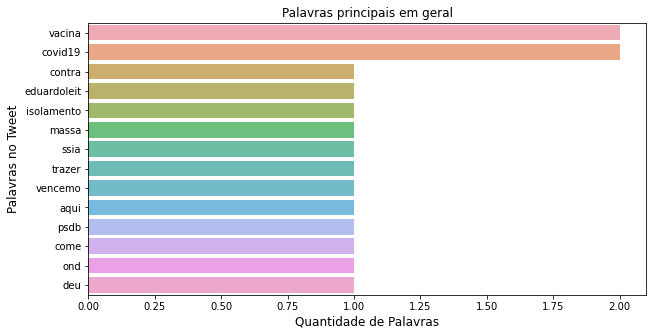

In [ ]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Palavras principais em geral')
plt.ylabel('Palavras no Tweet', fontsize=12)
plt.xlabel('Quantidade de Palavras', fontsize=12)
plt.show()